## pip install numpy pandas seaborn matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Dataset
df = pd.read_csv('ShopSphere_Dataset.csv', parse_dates=['InvoiceDate'])

In [17]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  object        
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
 8   Revenue      385314 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 26.5+ MB


In [14]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [15]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [18]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [20]:
# Total number of unique customers, unique transactions and date range of the entire dataset
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [21]:
print(f'Total number of Unique Customers: {num_customers}')
print(f'Total number of Unique Transactions: {num_transactions}')
print(f'Date Range of Dataset: {date_range[0]} to {date_range[1]}')

Total number of Unique Customers: 4372
Total number of Unique Transactions: 20990
Date Range of Dataset: 2023-12-01 00:25:31 to 2024-12-31 23:52:56


In [22]:
# Validate Data to check for non-positive records
print('Rows with non-positive Quantity:', (df['Quantity'] <= 0).sum())
print('Rows with non-positive UnitPrice:', (df['UnitPrice'] <= 0).sum())

Rows with non-positive Quantity: 0
Rows with non-positive UnitPrice: 0


In [23]:
# Checking average revenue
average_revenue = df['Revenue'].mean()
print(f'Average order value: {average_revenue}')

Average order value: 2341.7934992499618


In [27]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print('Country by number of customers')
print(top_countries)

Country by number of customers
Country
United States     4372
United Kingdom    4359
Name: CustomerID, dtype: int64


C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


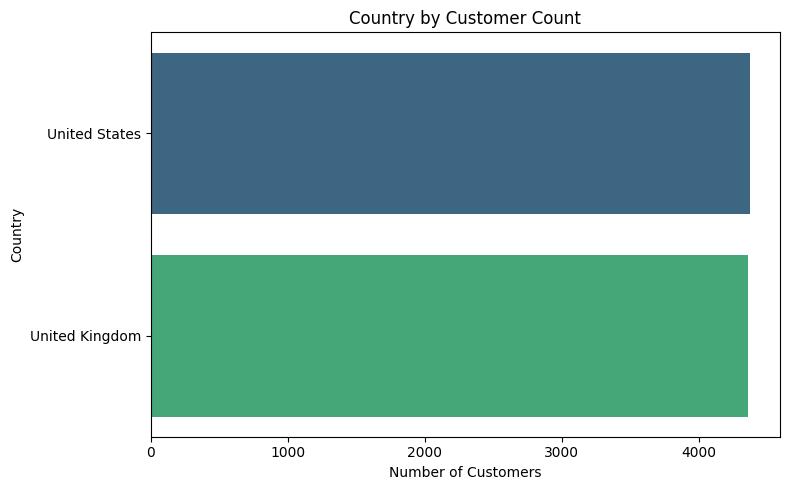

In [28]:
# plotting top country by customer count
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Country by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


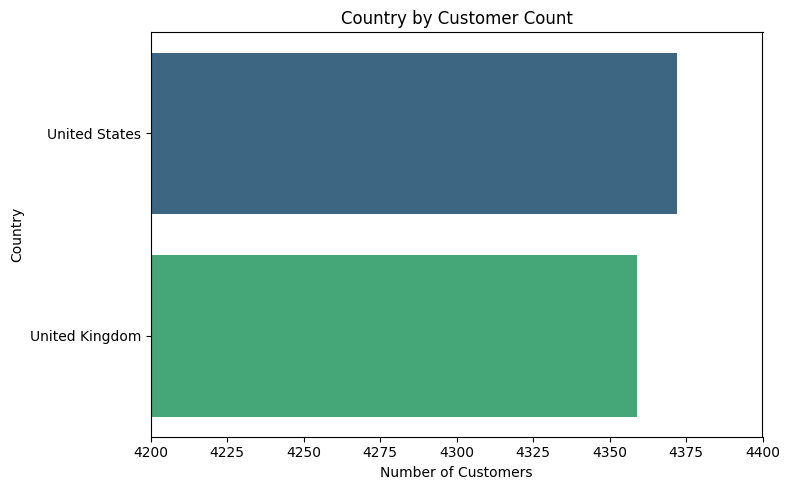

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlim(4200, 4400)
plt.title('Country by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()